# Demo 5 - Module 5 - Polygenic risk scores 
***

## **Step 1.** In this session, we will start with obtaining a Polygenic Score (PGS) file from the [PGS catalog](https://www.pgscatalog.org/)

+ The following file containg PGS scoring parameters for the traint: **ACPA-positive rheumatoid arthritis**

    `wget https://ftp.ebi.ac.uk/pub/databases/spot/pgs/scores/PGS000194/ScoringFiles/PGS000194.txt.gz`

## **Step 2.** Next, we obtain a VCF file for participants belonging to the Colombian population (CLM) sampled as part of the 1000 Genomes Project.

`ls data/CLM.allChrs.forPGS*`

```
data/CLM.allChrs.forPGS.bed  data/CLM.allChrs.forPGS.log
data/CLM.allChrs.forPGS.bim  data/CLM.allChrs.forPGS.nosex
data/CLM.allChrs.forPGS.fam
```

## Step 3. We will use the **plink --score** flag to calculate Polygenic Risk Scores (PRS) for all the CLM individuals we have.

### 1. An important aspect of this process is to understand what resides in a PGS scoring file we obatined in Step 1. So let's have a quick look at that:

+ `head data/PGS/PGS000194.forPlink.txt`

```
rsID	chr_name	chr_position	effect_allele	reference_allele	effect_weight	weight_type	allelefrequency_effect	is_haplotype	imputation_method	variant_description	OR
rs10911628	1	184680369	A	C	0.0	log(OR)	0.06	FALSE			1.00
rs11209026	1	67240275	A	G	0.0	log(OR)	0.06	FALSE			1.00
rs11264341	1	155179017	T	C	0.0	log(OR)	0.41	FALSE			1.00
rs12044149	1	67135003	T	G	0.0	log(OR)	0.24	FALSE			1.00
rs12140275	1	38168207	T	A	-0.11653381625595151	log(OR)	0.22	FALSE			0.89
rs12141575	1	67281753	A	G	0.0	log(OR)	0.34	FALSE			1.00
rs1471633	1	145711327	A	C	0.0	log(OR)	0.49	FALSE			1.00
rs17849501	1	183573188	T	C	0.0	log(OR)	0.06	FALSE			1.00
rs1801274	1	161509955	A	G	0.0	log(OR)	0.49	FALSE			1.00
```

+ There are three columns in this file that are of key interest to us:
    + **rsID (SNP ID)**
        + This is a unique accession ID assigned to a variant by dbSNP. 
    + **effect allele**
        + The allele whose effects in relation to disease are being studied
    + **effect weight**
        + Contribution of respective SNP to the genetic variance of the trait

### 2. Now that we understand what the three columns mean, we will use **plink --score**.

The arguments: 1,4, & 8 represent the column numbers for rsId, effect allele, and effect weight

`plink --bfile data/CLM.allChrs.forPGS --score data/PGS/PGS000194.forPlink.txt 1 4 8 header --out data/CLM.PGS000194.PGS`

```
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to data/CLM.PGS000195.PGS.log.
Options in effect:
  --bfile data/CLM.allChrs.forPGS
  --out data/CLM.PGS000195.PGS
  --score data/PGS/PGS000194.forPlink.txt 1 4 8 header

511706 MB RAM detected; reserving 255853 MB for main workspace.
208 variants loaded from .bim file.
94 people (0 males, 0 females, 94 ambiguous) loaded from .fam.
Ambiguous sex IDs written to data/CLM.PGS000195.PGS.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 94 founders and 0 nonfounders present.
Calculating allele frequencies...  done.
Total genotyping rate is 0.999489.
208 variants and 94 people pass filters and QC.
Note: No phenotypes present.
Warning: 2 lines skipped in --score file (1 due to variant ID mismatch, 0 due
to allele code mismatch); see data/CLM.PGS000195.PGS.nopred for details.
--score: 207 valid predictors loaded.
--score: Results written to data/CLM.PGS000195.PGS.profile .
```


+ As indicated by plink, our results are in:
    ```head data/CLM.PGS000194.PGS.profile```
    
    ```
         FID       IID  PHENO    CNT   CNT2    SCORE
  HG01112   HG01112     -9    414    130 0.110507
  HG01113   HG01113     -9    414    115 0.0922705
  HG01119   HG01119     -9    414    100 0.081087
  HG01121   HG01121     -9    414    127 0.103406
  HG01122   HG01122     -9    414    117 0.0991304
  HG01124   HG01124     -9    414    121 0.0955314
  HG01125   HG01125     -9    414    117 0.0976329
  HG01130   HG01130     -9    414    119 0.103551
  HG01131   HG01131     -9    412    125  0.10842
    ```

## Step 4. We will now regress the PRS scors for all 94 CLM individuals against their European & Native American ancestry percentage. 

### 1. Remeber from **Admixture** module, we have the three ancestry fractions: African, European, & Native American for all CLM individuals. We will combine the information together:

#### We will use R programming language to merge the datasets.

In [24]:
library("plyr")
library("dplyr")
library("ggplot2")
library("reshape2")

In [5]:
#Let's read in the ancestry estimate file.
combinedAncestryEstimatesData = read.table("data/combinedAncestryEstimatesData.tsv", header = TRUE)
head(combinedAncestryEstimatesData)
#Let's read the PGS score file.
pgs = read.table("data/CLM.PGS000195.PGS.profile", header = TRUE)
head(pgs)

,IndividualID,PopGroup,NativeAmerican,African,European
,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,HG01500,IBS,1e-05,1e-05,0.99998
2,HG01501,IBS,1e-05,1e-05,0.99998
3,HG01503,IBS,1e-05,1e-05,0.99998
4,HG01504,IBS,1e-05,1e-05,0.99998
5,HG01506,IBS,1e-05,1e-05,0.99998
6,HG01507,IBS,1e-05,1e-05,0.99998


,FID,IID,PHENO,CNT,CNT2,SCORE
,<fct>,<fct>,<int>,<int>,<int>,<dbl>
1,HG01112,HG01112,-9,414,130,0.1105070
2,HG01113,HG01113,-9,414,115,0.0922705
3,HG01119,HG01119,-9,414,100,0.0810870
4,HG01121,HG01121,-9,414,127,0.1034060
5,HG01122,HG01122,-9,414,117,0.0991304
6,HG01124,HG01124,-9,414,121,0.0955314


In [6]:
pgsScoresWithAncestry = merge(combinedAncestryEstimatesData, pgs, by.x = 'IndividualID', by.y = 'IID')

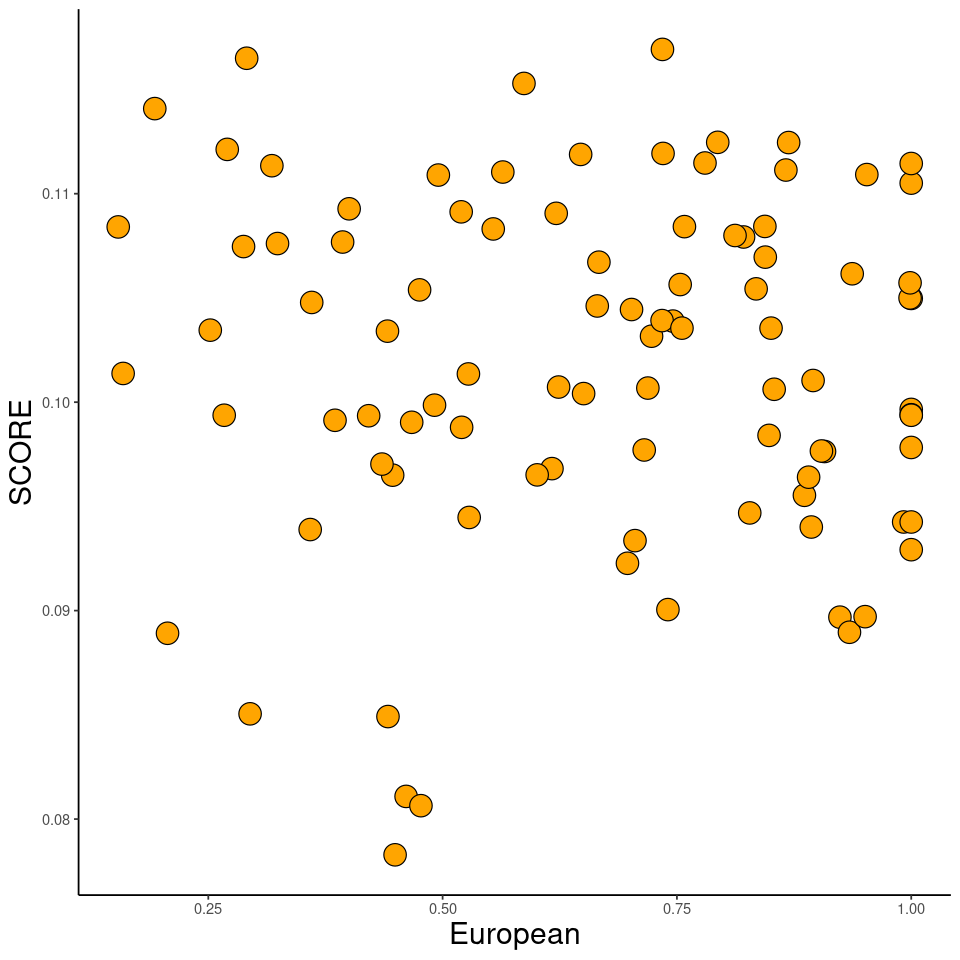

In [22]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(pgsScoresWithAncestry, aes(x=European, y=SCORE)) +
  geom_point(size = 6, pch = 21, color="black", fill="orange") + theme_classic() + theme(axis.title=element_text(size=18))


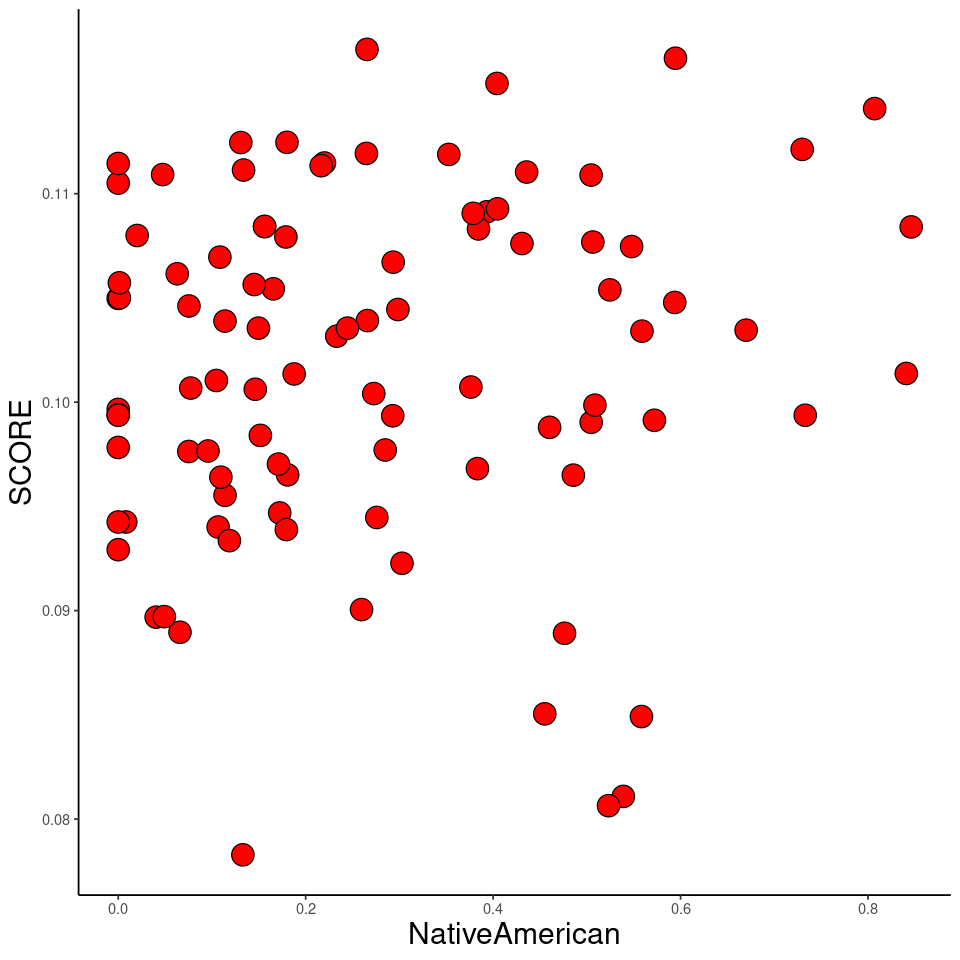

In [23]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(pgsScoresWithAncestry, aes(x=NativeAmerican, y=SCORE)) +
  geom_point(size = 6, pch = 21, color="black", fill="red") + theme_classic() + theme(axis.title=element_text(size=18))
